In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import os
from typing import Optional, Union
from __future__ import annotations
import math
from scipy import special
from math import log, e

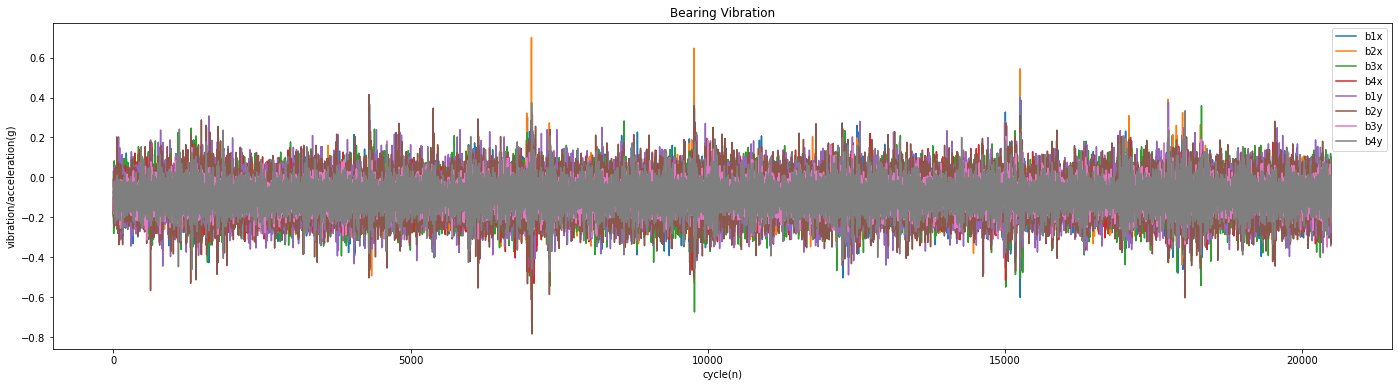

In [14]:
dataset = pd.read_csv('./1st_test/2003.10.22.12.06.24', sep='\t')
dataset.columns = ['b1x', 'b2x', 'b3x', 'b4x','b1y', 'b2y', 'b3y', 'b4y']
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()


In [18]:
type(list(dataset['b1x']))

list


In this section several signal-based statistical features has been extracted from the data                                 
**Definition and formula of the features:**
* ***Absolute Mean*** $$\overline{x} = \frac{1}{N}\sum_{i=1}^{N}|x_i| $$

* ***Standart Deviation:*** $$\sigma         = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \overline{x})^2}$$
* ***Skewness:*** 
Asymmetry of a signal distribution. Faults can impact distribution symmetry and therefore increase the level of skewness.
$$\mathrm{Sk} = \frac{1}{N}\sum_{i=1}^{N}\frac{(x_i-\overline{x})^3}{\sigma^3}$$
* ***Kurtosis:***
Length of the tails of a signal distribution, or equivalently, how outlier prone the signal is. Developing faults can increase the number of outliers, and therefore increase the value of the kurtosis metric. In essence it means how the tail of a distribution differ from the normal distributions. kurtosis identifies whether the tails of a given distribution contain extreme values
$$\mathrm{K} = \frac{1}{N}\sum_{i=1}^{N}\frac{(x_i-\overline{x})^4}{\sigma^4}$$
* ***Entropy:***
is a measure of uncertainty of the probability distribution of the vibration signal
$$ H(X) = -\sum_{i=1}^{N} P(x_i)\log{P(x_i)} $$

where pxi are the probabilities computed from the distribution of x.
                            
* ***RMS:*** $$x_{rms} =\sqrt{(\frac{1}{N})\sum_{i=1}^{N}(x)^{2}}$$

* ***Peak to Peak:*** $$ x_p = \max \mathrm{value} - \min \mathrm{value}$$

* ***Crest Factor:*** 
Peak value divided by the RMS. Faults often first manifest themselves in changes in the peakiness of a signal before they manifest in the energy represented by the signal root mean squared. The crest factor can provide an early warning for faults when they first develop. is defined as the ratio of the peak amplitude value, xp, and the RMS amplitude
$$x_{crest} =\frac{\max \mathrm{value}}{\mathrm{x_{rms}}}$$

* ***Clearence Factor:*** 
Peak value divided by the squared mean value of the square roots of the absolute amplitudes. For rotating machinery, this feature is maximum for healthy bearings and goes on decreasing for defective ball, defective outer race, and defective inner race respectively. The clearance factor has the highest separation ability for defective inner race faults. is defined as the ratio of the maximum value of the input vibration signal to the mean square root of the absolute value of the input vibration
signal
$$ x_{clear} = \frac{x_p}{(\frac{1}{N}\sum_{i=1}^{N}\sqrt{|x_i|})^2}  $$

* ***Shape Factor:*** 
is defined as the ratio of the RMS value to the average of the absolute value of the vibration sign
$$\frac{x_{rms}}{\overline{x}}$$

* ***Impulse:*** 
Compare the height of a peak to the mean level of the signal.  is defined as the ratio of the peak value to the average of the
absolute value of the vibration signal
$$\frac{\max \mathrm{value}}{\overline{x}}  $$




In [4]:
# Root Mean Squared Sum
def get_rms(data):
    value = np.sqrt((data**2).sum() / len(data))
    rms_list = value
    return rms_list

# Peak to peak calculation
def calculate_p2p(df):
    return df.max().abs() + df.min().abs()

# extract shannon entropy (cut signals to 500 bins) Shannon's Entropy is simply the "amount of information" in a variable
def get_entropy(signal, base=None):
    vc = signal.value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()
# extract clearence factor
def calculate_clearence(df):
     
    result = ((np.sqrt(df.abs())).sum() / len(df))**2
    
    return result

In [5]:
directory_path = './1st_test'
dataframe = pd.DataFrame(columns=['mean','std','skewness','kurtosis','rms','max','peak_to_peak', 'crest', 'clearence', 'shape', 'impulse'])
healthy = 0
for file in os.listdir(directory_path):
    file_data = pd.read_csv(os.path.join(directory_path, file),sep='\t')
    if file == '2003.11.22.09.16.56':
        healthy = 1
    concerned_data = file_data.iloc[:,5:6]
    mean = np.array(concerned_data.abs().mean())[0]
    standard_deviation = np.array(concerned_data.std())[0]
    skewness = np.array(concerned_data.skew())[0]
    kurtosis = np.array(concerned_data.kurtosis())[0]
    rms = np.array(get_rms(concerned_data))[0]
    max_abs = np.array(concerned_data.abs().max())[0]
    peak_2_peak = calculate_p2p(concerned_data)[0]
    crest = max_abs/rms
    clearence = np.array(calculate_clearence(concerned_data))[0]
    shape = rms / mean
    impulse = max_abs / mean
    
    dataframe = dataframe.append({
        'mean':mean,
        'std':standard_deviation,
        'skewness':skewness,
        'kurtosis':kurtosis,
        'rms':rms,
        'max':max_abs,
        'peak_to_peak':peak_2_peak,
        'crest':crest,
        'clearence':clearence,
        'shape':shape,
        'impulse':impulse
    },ignore_index=True)


dataframe

,mean,std,skewness,kurtosis,rms,max,peak_to_peak,crest,clearence,shape,impulse
0,0.108150,0.095490,-0.022286,0.777436,0.131821,0.784,1.199,5.947458,0.093392,1.218868,7.249168
1,0.108458,0.094386,-0.028728,0.682840,0.132052,0.576,0.993,4.361910,0.093646,1.217537,5.310789
2,0.109875,0.094055,0.019566,0.751218,0.133295,0.620,0.984,4.651352,0.095119,1.213143,5.642756
3,0.110010,0.096508,-0.008438,0.667691,0.133972,0.684,1.036,5.105532,0.094920,1.217818,6.217610
4,0.109350,0.095047,-0.024844,0.475547,0.133282,0.623,1.055,4.674301,0.094207,1.218861,5.697322
...,...,...,...,...,...,...,...,...,...,...,...
2151,0.217346,0.258966,0.104428,2.306166,0.283039,1.809,3.503,6.391336,0.180950,1.302255,8.323147
2152,0.330122,0.441049,0.051580,6.813490,0.455034,5.000,8.884,10.988194,0.270239,1.378379,15.145899
2153,0.351640,0.477112,0.256820,6.755017,0.490281,4.724,8.992,9.635290,0.286049,1.394270,13.434191
2154,0.335432,0.444306,0.104538,5.816830,0.458873,4.089,7.568,8.910972,0.275450,1.368005,12.190257


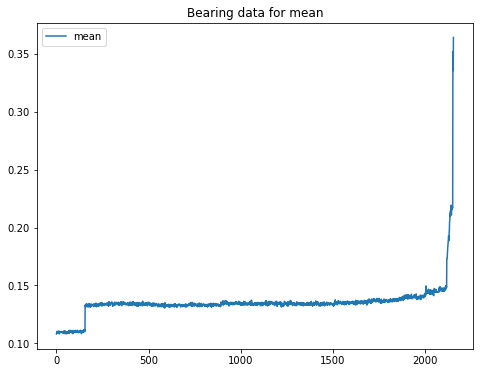

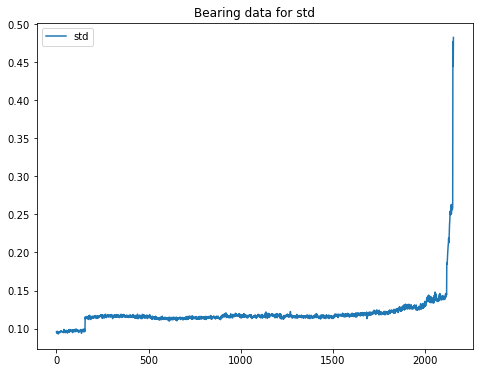

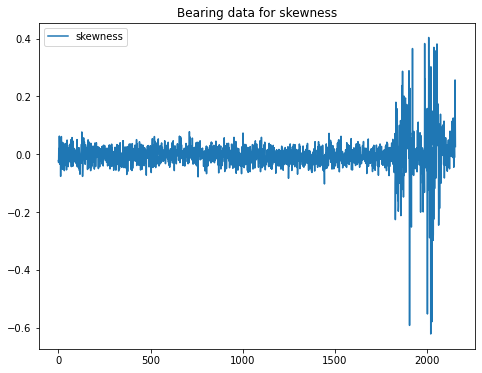

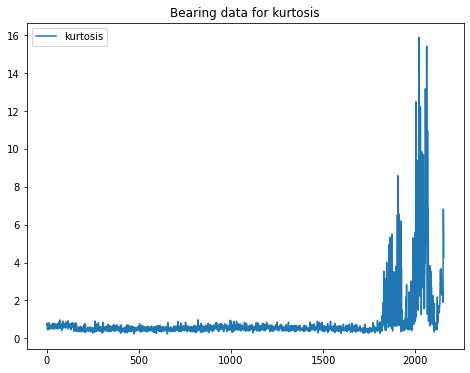

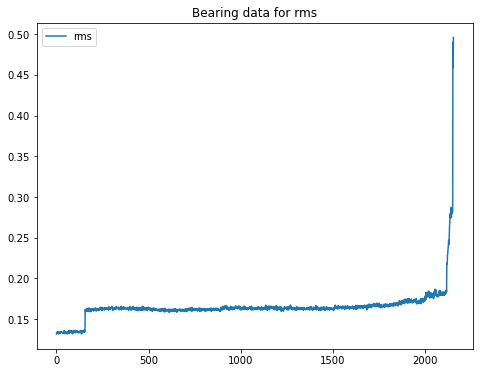

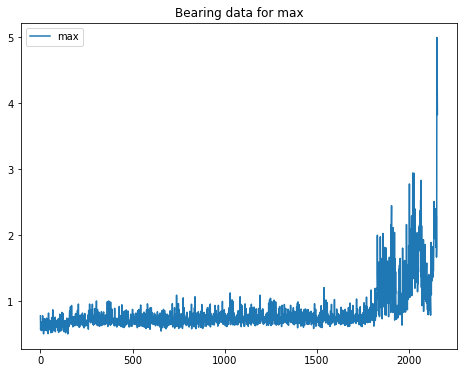

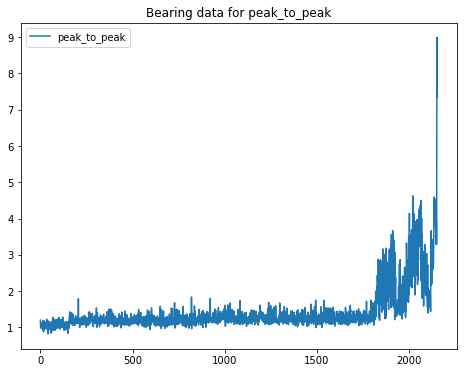

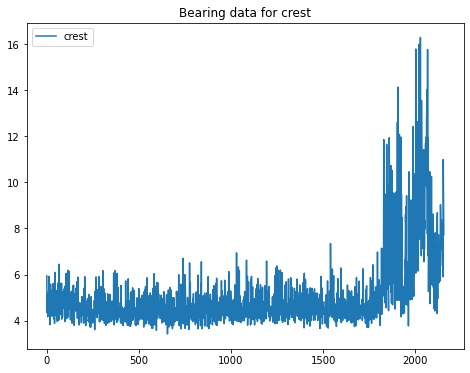

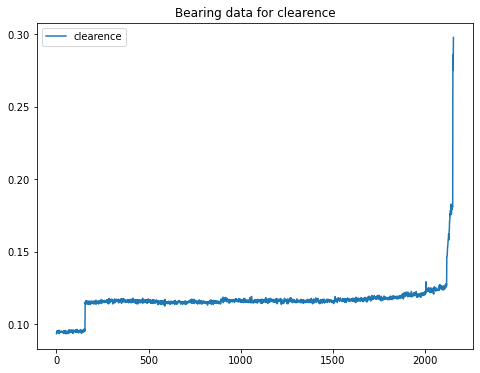

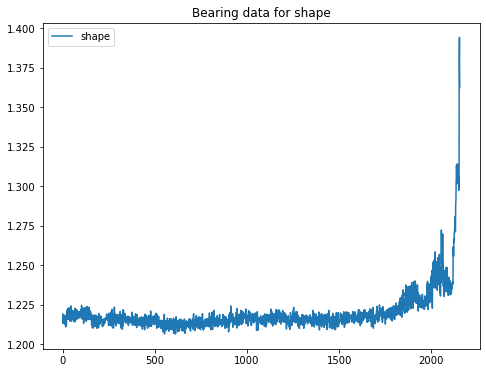

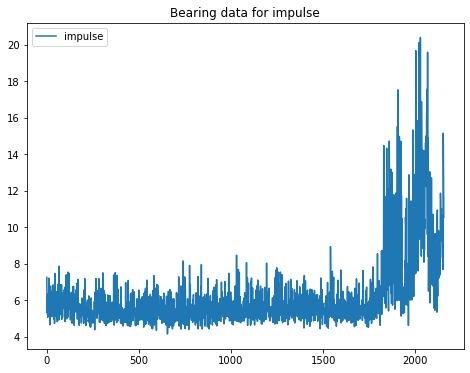

In [6]:
for col in dataframe:
    fig = plt.figure()
    ax1 = fig.add_subplot(141)
    dataframe[col].plot(figsize = (36,6), title="Bearing data for {}".format(col), legend = True ,axes=ax1)

In [7]:
df = dataframe.copy(deep=True)
df.drop('rms', inplace=True, axis=1)
df.drop('max', inplace=True, axis=1)
df.drop('peak_to_peak', inplace=True, axis=1)

df

,mean,std,skewness,kurtosis,crest,clearence,shape,impulse
0,0.108150,0.095490,-0.022286,0.777436,5.947458,0.093392,1.218868,7.249168
1,0.108458,0.094386,-0.028728,0.682840,4.361910,0.093646,1.217537,5.310789
2,0.109875,0.094055,0.019566,0.751218,4.651352,0.095119,1.213143,5.642756
3,0.110010,0.096508,-0.008438,0.667691,5.105532,0.094920,1.217818,6.217610
4,0.109350,0.095047,-0.024844,0.475547,4.674301,0.094207,1.218861,5.697322
...,...,...,...,...,...,...,...,...
2151,0.217346,0.258966,0.104428,2.306166,6.391336,0.180950,1.302255,8.323147
2152,0.330122,0.441049,0.051580,6.813490,10.988194,0.270239,1.378379,15.145899
2153,0.351640,0.477112,0.256820,6.755017,9.635290,0.286049,1.394270,13.434191
2154,0.335432,0.444306,0.104538,5.816830,8.910972,0.275450,1.368005,12.190257


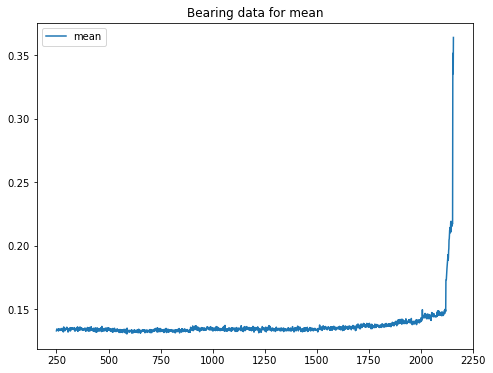

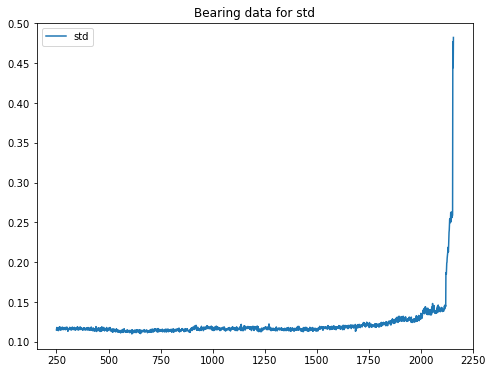

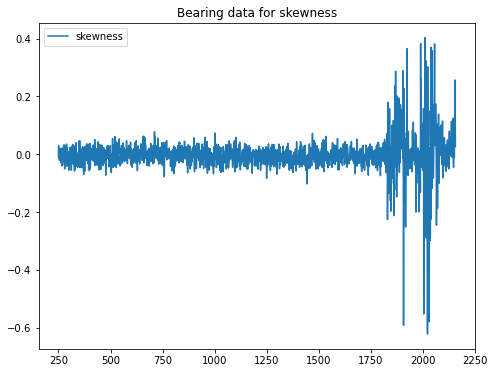

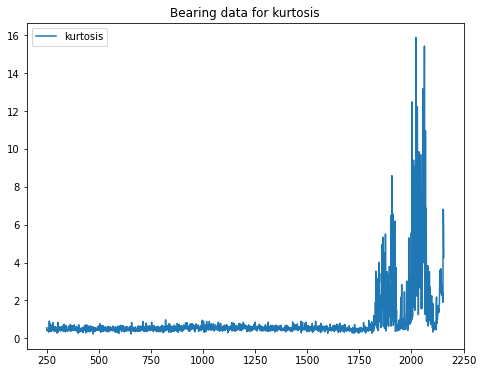

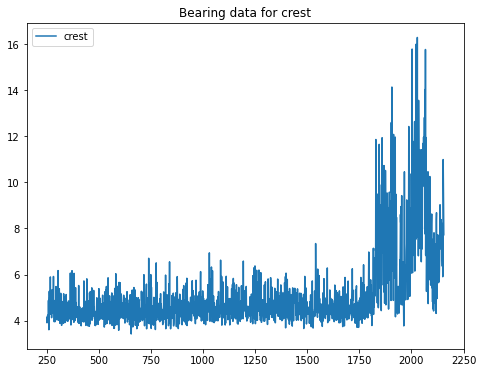

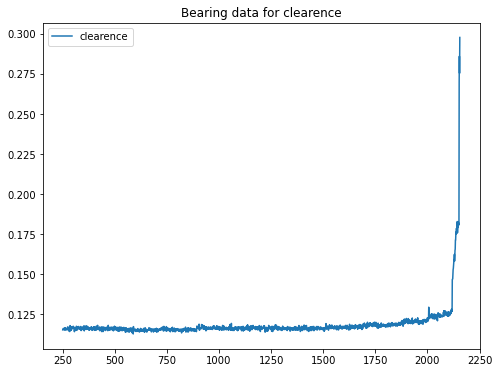

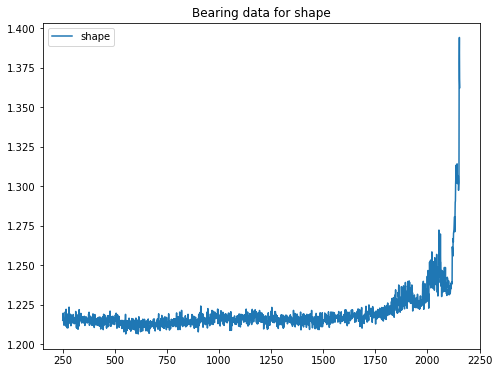

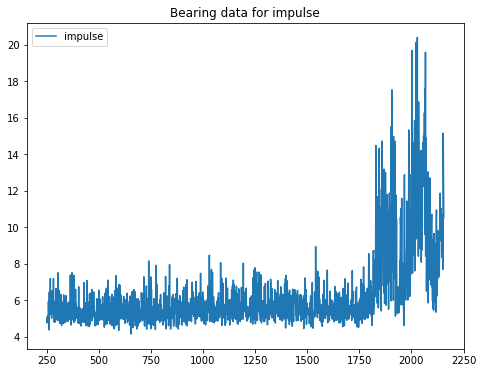

In [8]:
for col in df:
    fig = plt.figure()
    ax1 = fig.add_subplot(141)
    dataframe[col].iloc[250:].plot(figsize = (36,6), title="Bearing data for {}".format(col), legend = True ,axes=ax1)

In [9]:
features = ['mean','std','skewness','kurtosis', 'crest', 'clearence', 'shape', 'impulse']

In [10]:
df = df.iloc[250:]

In [11]:
for index,col in enumerate(df):
    mean_value = df[col].mean()
    std_value = df[col].std()
    first_col = f"{df[col].name}_upper_limit"
    second_col = f"{df[col].name}_lower_limit"
    df.insert(8+index, first_col, df[col] > mean_value + std_value, True)
    df.insert(9+index, second_col, df[col] < mean_value - std_value, True)        


In [12]:
df= df.replace(False, 0)
for name in features:
    df[f'{name}_limit'] = df.loc[:,[f"{name}_upper_limit",f"{name}_lower_limit"]].sum(axis=1)
    df.drop([f"{name}_upper_limit",f"{name}_lower_limit"], inplace=True, axis=1)
df

,mean,std,skewness,kurtosis,crest,clearence,shape,impulse,mean_limit,std_limit,skewness_limit,kurtosis_limit,crest_limit,clearence_limit,shape_limit,impulse_limit
250,0.132960,0.114969,-0.006072,0.552830,4.140872,0.115036,1.215104,5.031592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.133626,0.116610,0.029570,0.435868,3.909707,0.115429,1.215450,4.752053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.134450,0.117992,-0.014645,0.452501,4.079738,0.115906,1.219643,4.975823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,0.133797,0.116190,-0.013016,0.386415,4.122506,0.115584,1.216509,5.015065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.133373,0.115883,0.010876,0.455775,4.223004,0.115343,1.214413,5.128472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0.217346,0.258966,0.104428,2.306166,6.391336,0.180950,1.302255,8.323147,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2152,0.330122,0.441049,0.051580,6.813490,10.988194,0.270239,1.378379,15.145899,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2153,0.351640,0.477112,0.256820,6.755017,9.635290,0.286049,1.394270,13.434191,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2154,0.335432,0.444306,0.104538,5.816830,8.910972,0.275450,1.368005,12.190257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
df['healthy'] = df.iloc[:,8:].sum(axis=1)
df['healthy'] = np.where(df["healthy"]>4, 1, 0)
df

,mean,std,skewness,kurtosis,crest,clearence,shape,impulse,mean_limit,std_limit,skewness_limit,kurtosis_limit,crest_limit,clearence_limit,shape_limit,impulse_limit,healthy
250,0.132960,0.114969,-0.006072,0.552830,4.140872,0.115036,1.215104,5.031592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
251,0.133626,0.116610,0.029570,0.435868,3.909707,0.115429,1.215450,4.752053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
252,0.134450,0.117992,-0.014645,0.452501,4.079738,0.115906,1.219643,4.975823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
253,0.133797,0.116190,-0.013016,0.386415,4.122506,0.115584,1.216509,5.015065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
254,0.133373,0.115883,0.010876,0.455775,4.223004,0.115343,1.214413,5.128472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,0.217346,0.258966,0.104428,2.306166,6.391336,0.180950,1.302255,8.323147,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2152,0.330122,0.441049,0.051580,6.813490,10.988194,0.270239,1.378379,15.145899,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1
2153,0.351640,0.477112,0.256820,6.755017,9.635290,0.286049,1.394270,13.434191,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2154,0.335432,0.444306,0.104538,5.816830,8.910972,0.275450,1.368005,12.190257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [14]:
independant_var = df.iloc[:,:8]
dependant_var = df.iloc[:,-1:]
independant_var

,mean,std,skewness,kurtosis,crest,clearence,shape,impulse
250,0.132960,0.114969,-0.006072,0.552830,4.140872,0.115036,1.215104,5.031592
251,0.133626,0.116610,0.029570,0.435868,3.909707,0.115429,1.215450,4.752053
252,0.134450,0.117992,-0.014645,0.452501,4.079738,0.115906,1.219643,4.975823
253,0.133797,0.116190,-0.013016,0.386415,4.122506,0.115584,1.216509,5.015065
254,0.133373,0.115883,0.010876,0.455775,4.223004,0.115343,1.214413,5.128472
...,...,...,...,...,...,...,...,...
2151,0.217346,0.258966,0.104428,2.306166,6.391336,0.180950,1.302255,8.323147
2152,0.330122,0.441049,0.051580,6.813490,10.988194,0.270239,1.378379,15.145899
2153,0.351640,0.477112,0.256820,6.755017,9.635290,0.286049,1.394270,13.434191
2154,0.335432,0.444306,0.104538,5.816830,8.910972,0.275450,1.368005,12.190257


In [15]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV


In [16]:
x_train, x_test, y_train, y_test= train_test_split(independant_var, dependant_var, test_size= 0.40, random_state=0)

In [17]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [18]:
classifier= LogisticRegression(random_state=0, C=0.1)  
classifier.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.1, random_state=0)

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
cm= confusion_matrix(y_test ,y_pred)  
cm

array([[715,   5],
       [ 15,  28]], dtype=int64)

In [21]:
accuracy_score(y_test, y_pred)


0.9737876802096985

In [27]:
cross_val_score(classifier, y_test, y_pred, cv=5)

array([0.95424837, 0.95424837, 0.95424837, 0.96052632, 0.96052632])

In [22]:
import pickle
filename = 'logistic.pkl'
pickle.dump(classifier, open(filename, 'wb'))